# Visualization
2020-07-24

Visualizing registration methods.

In [1]:
%load_ext autoreload
%autoreload 2

In [154]:
import sys
sys.path.append('..')

import cv2
from imageio import imread
import numpy as np

from matplotlib.patches import Circle
import matplotlib.pyplot as plt

from modules import utils
from modules import registration

In [3]:
# use the normal breast TMA dataset (unregistered version) as an example
filepaths = utils.parse_tif_dir('/data/Datasets/normalBreast/', quench=False)

## Keypoint registration

Registration using keypoints requires the identification of image keypoints in both the moving and target image. Visualizing this is a key step in understanding what is being captured as a keypoint, which depends on the keypoint being used.

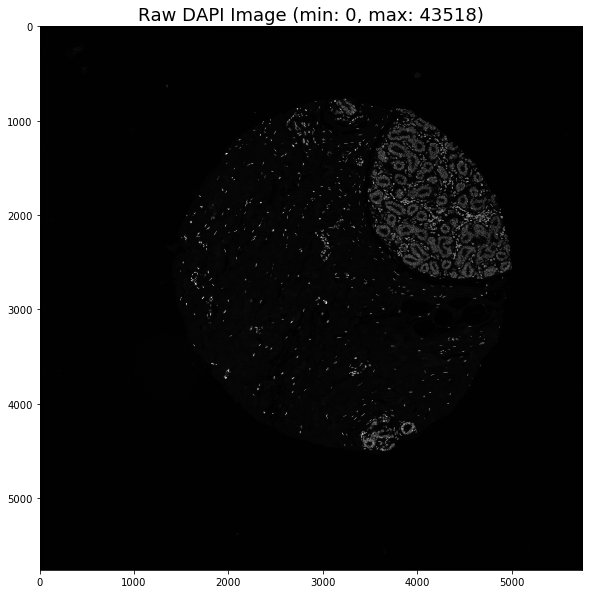

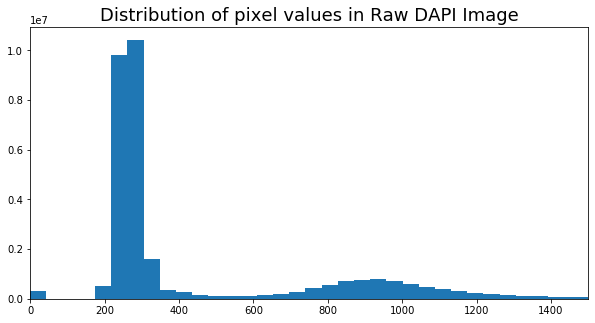

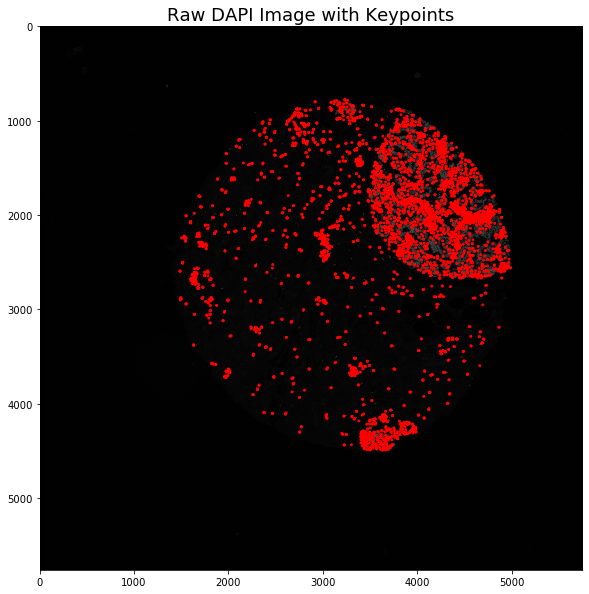

In [227]:
# image feature used in hackathon - KAZE features
# useful parameters:
#   upright - 0 to add orientation to the feature
#   extended - 1 for longer feature vector (128), 0 for basic length feature vector (64)
feature_detector = cv2.KAZE_create(upright=0, extended=1)

# opencv feature detectors take in an input image
# use a DAPI image which will have a lot of potential features
im = imread(filepaths[3][1])

plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.title(f'Raw DAPI Image (min: {np.min(im)}, max: {np.max(im)})', fontsize=18)
plt.show()

# note that the raw image has value ranges from 0 to the 10s of thousands (~30k)
# typical images we work with usually are bound from 0 to 255
# the distribution of pixels values tend to however fall in a smaller range (0 to 1000)
pixels = im.flatten()

plt.figure(figsize=(10, 5))
plt.hist(pixels, bins=1000)
plt.xlim([0, 1500])
plt.title('Distribution of pixel values in Raw DAPI Image', fontsize=18)
plt.show()

# compute the features (None parameter signifies no mask used, features are detected on entire image)
keypoints, descriptors = feature_detector.detectAndCompute(im, None)
plot_with_keypoints(im, keypoints, title='Raw DAPI Image with Keypoints')

## Comparing OpenCV Based Registration

Time to extract image features: 0 min 6 s


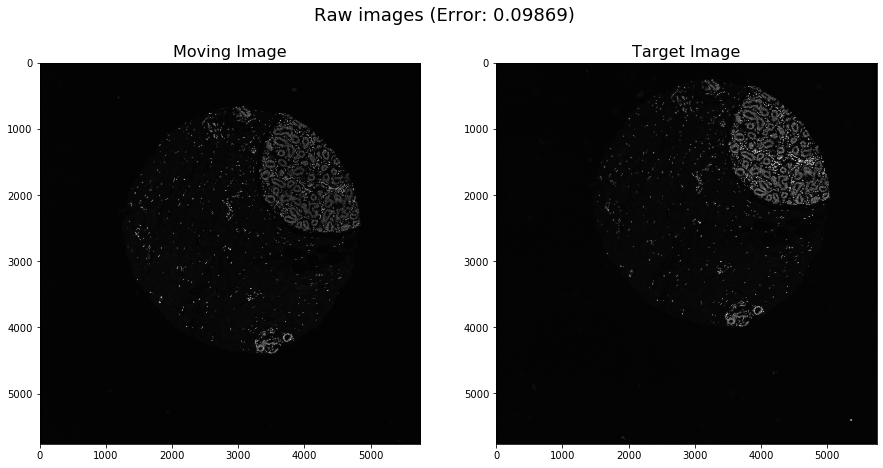

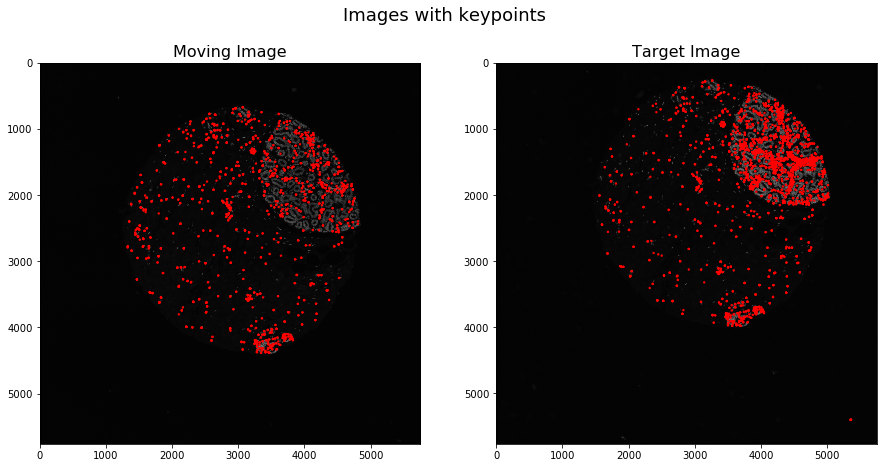

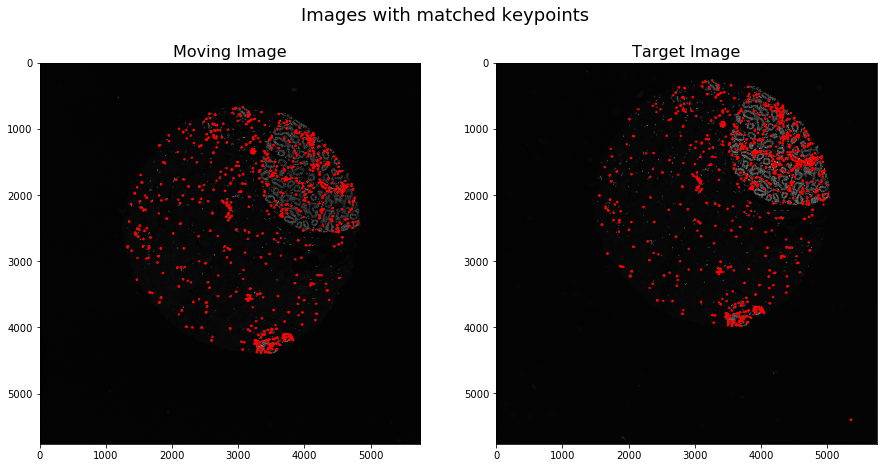

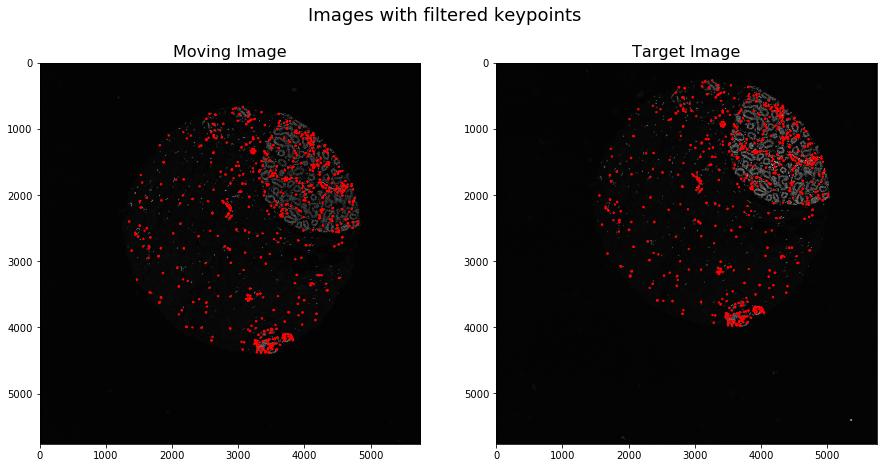

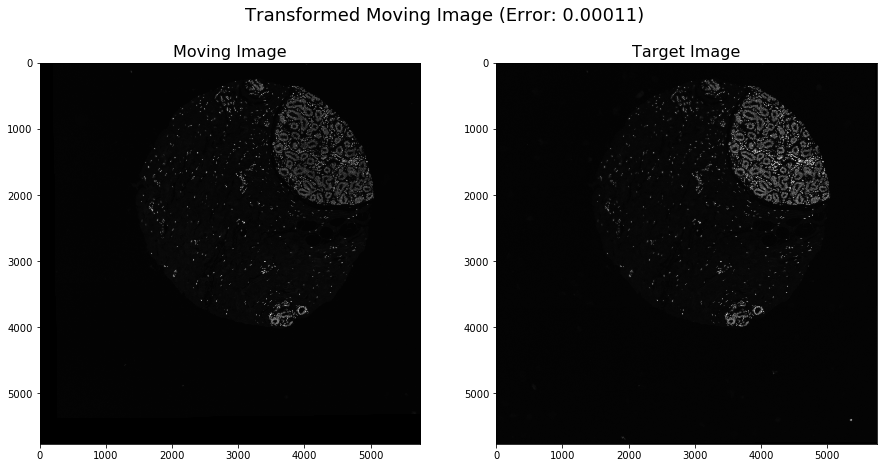

In [241]:
feature_detector = cv2.AKAZE_create()
moving_im = imread(filepaths[1][1])
target_im = imread(filepaths[5][1])

results = registration.register_images_adv(
    moving_im, target_im, feature_detector, matcher, visuals=True, savepath='/mnt/test'
)